In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\GOOG.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-12,132.423492,132.423492,127.575996,128.374496,128.374496,23004000
1,2022-04-13,128.626495,130.655746,128.438599,130.285995,130.285995,19542000
2,2022-04-14,130.649506,130.710251,127.111504,127.252998,127.252998,23484000
3,2022-04-18,127.410004,128.712006,126.578453,127.960999,127.960999,14918000
4,2022-04-19,128.076996,130.903748,127.451500,130.531006,130.531006,22720000
...,...,...,...,...,...,...,...
246,2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21864200
247,2023-04-06,105.769997,109.629997,104.815002,108.900002,108.900002,34684200
248,2023-04-10,107.389999,107.970001,105.599998,106.949997,106.949997,19741500
249,2023-04-11,106.919998,107.220001,105.279999,106.120003,106.120003,18721300


In [3]:
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'],axis = 'columns')

In [4]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low
Date,,,,,,,,
2022-04-12,132.423492,132.423492,127.575996,128.374496,128.374496,23004000,4.048996,4.847496
2022-04-13,128.626495,130.655746,128.438599,130.285995,130.285995,19542000,-1.659500,2.217147
2022-04-14,130.649506,130.710251,127.111504,127.252998,127.252998,23484000,3.396508,3.598747
2022-04-18,127.410004,128.712006,126.578453,127.960999,127.960999,14918000,-0.550995,2.133553
2022-04-19,128.076996,130.903748,127.451500,130.531006,130.531006,22720000,-2.454010,3.452248
...,...,...,...,...,...,...,...,...
2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21864200,1.170006,2.438004
2023-04-06,105.769997,109.629997,104.815002,108.900002,108.900002,34684200,-3.130005,4.814995
2023-04-10,107.389999,107.970001,105.599998,106.949997,106.949997,19741500,0.440002,2.370003


In [5]:
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2022-04-12,4.048996,4.847496
2022-04-13,-1.659500,2.217147
2022-04-14,3.396508,3.598747
2022-04-18,-0.550995,2.133553
2022-04-19,-2.454010,3.452248


In [6]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0])

In [7]:
sp = 0.7
split = int(sp * len(df))
X_train = X[:split]
Y_train = y[:split]
X_test = X[split:]
Y_test = y[split:]

In [8]:
cls = SVC().fit(X_train, Y_train)

In [9]:
y_train_pred = cls.predict(X_train)
train_acc = accuracy_score(Y_train, y_train_pred)
print("Train accuracy = ", train_acc)
y_test_pred = cls.predict(X_test)
test_acc = accuracy_score(Y_test, y_test_pred)
print("Test accuracy = ", test_acc)

Train accuracy =  0.6057142857142858
Test accuracy =  0.5131578947368421


In [10]:
df['Predicted_Signal'] = cls.predict(X)
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-12  132.423492  132.423492  127.575996  128.374496  128.374496   
2022-04-13  128.626495  130.655746  128.438599  130.285995  130.285995   
2022-04-14  130.649506  130.710251  127.111504  127.252998  127.252998   
2022-04-18  127.410004  128.712006  126.578453  127.960999  127.960999   
2022-04-19  128.076996  130.903748  127.451500  130.531006  130.531006   
...                ...         ...         ...         ...         ...   
2023-04-05  106.120003  106.540001  104.101997  104.949997  104.949997   
2023-04-06  105.769997  109.629997  104.815002  108.900002  108.900002   
2023-04-10  107.389999  107.970001  105.599998  106.949997  106.949997   
2023-04-11  106.919998  107.220001  105.279999  106.120003  106.120003   
2023-04-12  107.389999  107.586998  104.970001  105.220001  105.220001   

              Volume  Open-Close  Hig

In [11]:
df['Return'] = df.Close.pct_change()

In [12]:
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)

In [13]:
df['Cum_Ret'] = df['Return'].cumsum()

In [14]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2022-04-12,132.423492,132.423492,127.575996,128.374496,128.374496,23004000,4.048996,4.847496,0,NaN,NaN,NaN,NaN
2022-04-13,128.626495,130.655746,128.438599,130.285995,130.285995,19542000,-1.659500,2.217147,0,0.014890,0.0,0.014890,0.000000
2022-04-14,130.649506,130.710251,127.111504,127.252998,127.252998,23484000,3.396508,3.598747,0,-0.023280,-0.0,-0.008390,0.000000
2022-04-18,127.410004,128.712006,126.578453,127.960999,127.960999,14918000,-0.550995,2.133553,0,0.005564,0.0,-0.002826,0.000000
2022-04-19,128.076996,130.903748,127.451500,130.531006,130.531006,22720000,-2.454010,3.452248,1,0.020084,0.0,0.017259,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21864200,1.170006,2.438004,0,-0.001617,-0.0,-0.124067,0.219806
2023-04-06,105.769997,109.629997,104.815002,108.900002,108.900002,34684200,-3.130005,4.814995,0,0.037637,0.0,-0.086430,0.219806
2023-04-10,107.389999,107.970001,105.599998,106.949997,106.949997,19741500,0.440002,2.370003,0,-0.017906,-0.0,-0.104336,0.219806


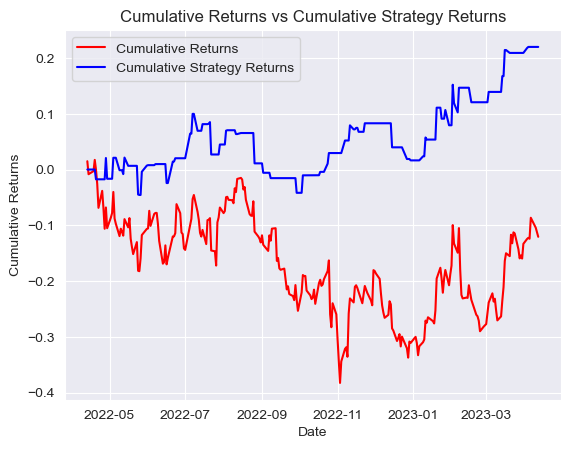

In [15]:
plt.plot(df['Cum_Ret'], color='red', label='Cumulative Returns')
plt.plot(df['Cum_Strategy'], color='blue', label='Cumulative Strategy Returns')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Cumulative Strategy Returns')
plt.show()

In [16]:
y_train_pred = cls.predict(X_train)
train_acc = accuracy_score(Y_train, y_train_pred)
print("Train accuracy = ", train_acc)
y_test_pred = cls.predict(X_test)
test_acc = accuracy_score(Y_test, y_test_pred)
print("Test accuracy = ", test_acc)

Train accuracy =  0.6057142857142858
Test accuracy =  0.5131578947368421


In [17]:
df['Predicted_Close'] = df['Close'] + df['Open-Close'].shift(-1) * df['Predicted_Signal']
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy,Predicted_Close
Date,,,,,,,,,,,,,,
2022-04-12,132.423492,132.423492,127.575996,128.374496,128.374496,23004000,4.048996,4.847496,0,NaN,NaN,NaN,NaN,128.374496
2022-04-13,128.626495,130.655746,128.438599,130.285995,130.285995,19542000,-1.659500,2.217147,0,0.014890,0.0,0.014890,0.000000,130.285995
2022-04-14,130.649506,130.710251,127.111504,127.252998,127.252998,23484000,3.396508,3.598747,0,-0.023280,-0.0,-0.008390,0.000000,127.252998
2022-04-18,127.410004,128.712006,126.578453,127.960999,127.960999,14918000,-0.550995,2.133553,0,0.005564,0.0,-0.002826,0.000000,127.960999
2022-04-19,128.076996,130.903748,127.451500,130.531006,130.531006,22720000,-2.454010,3.452248,1,0.020084,0.0,0.017259,0.000000,133.569504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21864200,1.170006,2.438004,0,-0.001617,-0.0,-0.124067,0.219806,104.949997
2023-04-06,105.769997,109.629997,104.815002,108.900002,108.900002,34684200,-3.130005,4.814995,0,0.037637,0.0,-0.086430,0.219806,108.900002
2023-04-10,107.389999,107.970001,105.599998,106.949997,106.949997,19741500,0.440002,2.370003,0,-0.017906,-0.0,-0.104336,0.219806,106.949997


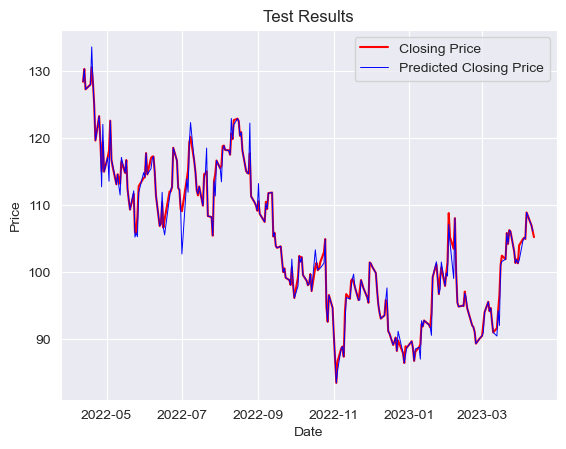

In [18]:
plt.plot(df['Close'],color='red', label = 'Closing Price')
plt.plot(df['Predicted_Close'],color='blue', label = 'Predicted Closing Price', linewidth = 0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Test Results')
plt.show()

In [19]:
last_row = df.iloc[-1]
last_input = np.array([[last_row['Open-Close'], last_row['High-Low']]])
next_signal = cls.predict(last_input)[0]
next_open = df.iloc[-1]['Open']
next_close = next_open + (next_signal * last_row['Open-Close'])
print('Predicted next day closing price:', next_close)

Predicted next day closing price: 107.389999
